#1. 데이터 준비
> 본 데이터는 캐글(https://www.kaggle.com/)에서 연습문제로 지원해 주는 데이터이다. 캐글은 2010년 4월에 설립된 공공 및 기업 데이터를 활용한 머신러닝 경진대회 플랫폼이다. 

> 우리가 분석할 내용은 titanic 호에서 생존한 사람들에 대해 분석해 보려 한다.
##1.1 데이터 열기
> 구글 드라이브에 데이터를 업로드한 후 읽어들여 보자

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

filepath = '/content/drive/MyDrive/3. 파이프라인/data/titanic.csv'
df = pd.read_csv(filepath)
df

##1.2. 데이터 백업
> 데이터를 분석하다 보면 여러 가공과정을 거치면서 원본 데이터가 손실될 수 있다. 다양한 방법으로 분석하다 보면 원본을 다시 가져다 사용하는 경우가 빈번하다. 데이터를 백업함으로써 원본 데이터를 유지할 수 있다.

In [ ]:
df_backup = df.copy()
df_backup

> 현재 상태를 그대로 복사하여 백업본을 만든다.

In [6]:
filepath = '/content/drive/MyDrive/3. 파이프라인/data/titanic_backup.csv'
df_backup.to_csv(filepath)

>to_csv 함수는 dataframe을 csv 파일로 저장하는 기능을 한다. 위의 코드에서 백업한 df_backup dataframe을 이용하여 filepath위치에 titanic_backup.csv라는 파일을 만들어 데이터를 저장하는 기능을 한다. 실행 후 위의 위치로 이동하면 titanic_backup.csv파일이 생성된 것을 확인할 수 있다.

In [ ]:
df_titanic = pd.read_csv(filepath)
df_titanic.drop(['Unnamed: 0'], axis=1, inplace=True)
df_titanic

>백업으로 저장한 filepath를 다시 읽어 들여 정상적으로 저장되었는지 확인한다. 이렇게 읽어 들이면 기존의 index정보가 그대로 저장되어 unnamed: 0으로 새로운 feature정보를 갖게 된다. drop을 통해 이를 제거하고 사용하자.

#2. 데이터 보기
##2.1 데이터의 기본 정보 확인
>info함수를 이용하여 데이터의 기본 정보를 확인할 수 있다.

In [ ]:
df.info()

* 위의 정보를 통해 총 12개의 열이 존재하며 총 891개의 행(고객정보)이 존재한다.
* age, cabin, embarked의 데이터 개수가 891개가 안되는 것으로 누락된 데이터가 존재하는 것을 알 수 있다.

##2.2 기초 통계 정보 확인
> 기초 통계 정보를 확인하여 추후 어떠한 방향으로 데이터를 분석할지 생각해 본다.

In [ ]:
df.describe()

* passengerId는 승객번호로 총 891개가 존재하며 총 승객수와 일치함으로 결측치는 없는 것으로 볼 수 있다. 또한 표준편차가 257로 높게 나타나 데이터의 분포가 평균값과 멀게 분포된 것을 볼 수 있고 최소값이 1이며 최대값이 891인 것으로 보아 순차적으로 퍼진 데이터 인 것을 알 수 있다.
* Survived는 생존여부이며 0은 사망, 1을 생존으로 처리하였다. 총 891개가 존재하며 최소값이 0이고 최대값이 1이며 사분위수에 0과1이외의 데이터가 없는 것으로 보아 0, 1로만 데이터가 이루어 진것을 알 수 있다. 또한 평균이 0.383838인 것으로 1의 개수가 38%정도인 것을 알 수 있다. 즉, 생존율이 38%인 것을 알 수 있다.
* Pclass는 객실 등급으로 891개의 데이터가 존재하여 결측치는 없는 것을 알 수 있다. 사분위수의 값으로 1,2,3의 데이터 집합인 것을 알 수 있고 평균이 2, 3인것으로 1보다는 2와 3의 수들이 더 많이 나타나는 것을 알 수 있다. 중위수가 3인 것으로 가장 많이 수는 3인 것을 알 수 있다. 즉, 3등급 자리가 가장 많으며 1등급 자리가 가장 적은 것을 알 수 있다.
* age는 나이로 714개가 존재하며 결측치가 발생한 것을 알 수 있다. 사분위수를 확인해 보면 25%가 20.125 50%가 28로 20대가 많을 것으로 예상되며 최소값이 0.42로 나타난 것은 나이 판단 시 영아들은 생후 몇개월 형식으로 표현한 것을 예측할 수 있다.이를 확인하기 위해 2세 미만의 아이들을 확인해 보면 1세에는 소수점 이하 수치가 0으로 나타나지만 1세 미만인 경우 소수점 이하 수치가 나타나는 것을 볼 수 있다. 평균이 29.70이고 표준 편차가 14.53인 것을 보아 다양한 연령대가 탑승한 것을 알 수 있다.
* SibSp는 동승자 중 형자나 배우자를 의미하는 것으로 평균과 사분위수로 혼자탄 인원이 많은 것을 알 수 있다.
* Parch는 동승자 중 부모, 혹은 아이의 수를 의미하며 사분위수와 평균으로 혼자 탄 인원이 많은 것을 알 수 있다.
* Fare는 탑승 요금을 의미하며 최소값이 0원인 것을 보면 초청장이 발행되었다는 것을 알 수 있다. 또한 사분위수로 3등급 자리는 10달러 내외정도 생각할 수 있다.

> 이처럼 각 데이터로 다양한 것을 알 수 있다.

##2.3 데이터 확인

In [ ]:
df.head()

In [ ]:
df.tail()

> head와 tail을 통해 데이터들이 어떻게 분포되어 있는지 알 수 있다.

##2.4 정렬

In [ ]:
df_titanic.sort_values(by=['Fare'])

>dataframe에서 행 정보를 index 열 정보를 row 또는 value로 표현하며 sort_values는 열 정보, 즉 feature정보를 기준으로 정렬하는 함수이다. 위의 코드에서는 타이타닉 정보에서 요금(Fare)를 기준으로 정렬을 한 것이다.

In [ ]:
df_titanic.sort_values(by=['Fare'], axis=0)

> axis 정보는 기본값이 0이므로 별도로 지정하지 않아도 되며 위와 같이 명시화 시킬 수도 있다. 대다수의 언어에서 정렬의 기본값은 오름차순이며 이 함수 역시 오름차순으로 정렬하게 된다.

In [19]:
df_titanic.sort_values(by=['Fare'], ascending=False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
...,...,...,...,...,...,...,...,...,...,...,...,...
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0000,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0000,NaN,S
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0000,NaN,S
732,733,0,2,"Knight, Mr. Robert J",male,NaN,0,0,239855,0.0000,NaN,S


> Fare 순으로 정렬해 보니 679, 88, 27번의 요금이 3좌석에 대한 요금이라 판단되며 결국 512.3292은 이상치가 아닌 정상적인 요금이라 판단할 수 있다.

In [ ]:
df_titanic.sort_index()

>sort_index 함수는 index를 기준으로 정렬하는 함수이며 axis의 기본값은 0이다.

In [ ]:
df_titanic.sort_index(axis=1)

>axis=1을 설정하면 feature의 오름차순으로 정렬한 결과를 확인할 수 있다.

> 이 함수는 현재 분석내용과 관계 없이 sort_index가 무엇인지 알아보기 위해 사용한 것이다.

#3. 데이터 클린징

##3.1 결측치 확인

In [ ]:
df_titanic.count()
df_titanic.notnull().sum()

>위와 같이 count함수를 이용하여 유효데이터를 확인할 수 있다. 확인 결과 Age, Cabin(객실번호), Embarked(탑승 항구)에서 결측치가 발생한 것을 알 수 있었다.

> 같은 방법으로 notnull을 이용할 수도 있다.

In [ ]:
df_titanic.isnull().sum()

>마찬가지로 isnull().sum()을 이용하여 결측치 총 합을 구할 수 있다.

##3.2 결측치 시각화
###3.2.1 heatmap
> heatmap은 데이터의 분포상태를 표현하는 시각화 도구이다. heatmap는 두 개의 카테고리 정보를 한눈에 알아 볼 수 있다는 장점이 있다.

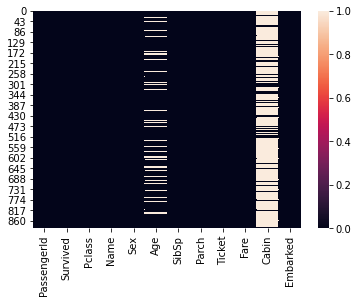

In [33]:
import seaborn as sns

sns.heatmap(df_titanic.isnull())

> heatmap을 이용하기 위해 seaborn 라이브러리를 등록하였다. heatmap은 값의 변화를 온도로 표현하여 변화량을 확인할 수 있는 그래프로 현재 타이타닉 정보의 결측치 유무(isnull)를 전달하여 결측치가 나타나는 부분은 True(1)로 아닌 부분은 False(0)으로 표현하게 된다. 

>실행결과 하얀 색으로 나타나는 부분이 결측치이며 이렇게 그래프를 이용하여 시각화 할 수 있다.

In [ ]:
sns.heatmap(df_titanic.isnull(), cbar= False)

>cbar 옵션은 colorbar를 의미하는 것으로 기존 그래프에서 나타났던 오른쪽 기준표이며 cbar=False로 지정하게 되면 오른쪽 기준표를 숨길 수 있다.

In [ ]:
sns.heatmap(df_titanic.isnull(), center=0.4)

>center 옵션은 기준 위치를 지정하는 것으로 기준값보다 높으면 붉은색 계열로 기준값보다 낮으면 파란색 계열로 표시한다. 이는 heatmap이 온도를 표현한 그래프이기 때문에 그렇다. 기준이 되는 center는 검정색으로 나타난다.

In [ ]:
sns.heatmap(df_titanic.isnull(), center=0.4, linewidths=0.0001)

>linewidths는 각 데이터를 선으로 구분짓기 위해 사용하는 옵션으로 현재는 데이터가 너무 많아 수치를 작게 표현했다.

> 그 이외에도 여러 옵션이 있으며 다음 사이트를 참고하기 바란다.
* https://dsbook.tistory.com/51

###3.2.2 missingno
>위키 백과를 확인하면 아래와 같이 정의되어 있다.
* https://ko.wikipedia.org/wiki/%EB%AF%B8%EC%8B%B1%EB%85%B8

>미싱노(영어: MissingNo. 또는 MissingNO[1], 일본어: けつばん 케츠반[*])는 닌텐도의 《포켓몬스터 적·녹》에서 발견되었던 버그(glitch) 포켓몬이다. “결번(Missing Number)”을 의미하는 미싱노는 개발자인 게임 프리크가 에러 핸들러로 이용한 것으로, 존재하지 않는 포켓몬[2]의 데이터에 접근을 시도할 경우 나타난다. 프로그램된 세 개의 이벤트가 연속 실행되면 일종의 버그로서 미싱노를 만날 수 있게 된다. 닌텐도가 처음으로 미싱노를 공식적으로 언급한 것은 《닌텐도 파워》 1999년 5월호를 통해서였다.

> 미싱노가 나타나면 그래픽 에러가 나타나거나 플레이어의 아이템 메뉴 상의 여섯 번째 아이템이 다중 복제된다. 미싱노는 전략 가이드와 게임 매거진에서 소개되었으며, IGN에서 가장 유명한 게임 버그의 하나로 다룬 바 있다. 포켓몬 적·녹 시리즈의 팬들은 미싱노를 게임 카논(설정)의 일부로서 합리화하려 했으며, 이러한 소프트웨어 에러의 창의적 활용은 사회학자들의 연구 대상이 되기도 했다.[3]

In [ ]:
import missingno as msno

msno.matrix(df_titanic)

>missingno의 matrix 함수를 이용하면 이전의 heatmap과 같은 그래프가 나타나게 된다.

In [ ]:
msno.matrix(df_titanic, figsize=(8, 4))

>figsize는 그래프의 크기를 지정하며 x, y 형식으로 입력하면 된다.

In [ ]:
msno.matrix(df_titanic, figsize=(8, 4), color=(0.5, 0.5, 0.2))

>위와 같이 heatmap과 비슷한 결과를 얻을 수 있다.
* figsize : x, y의 크기를 지정하여 그래프를 표현한다.
* color : RGB로 표현되며 0~1사이의 값을 입력할 수 있다.

In [ ]:
msno.bar(df_titanic, figsize=(8, 4))

> 위와 같이 막대바를 이용하여 결측치를 확인할 수 있다.

In [ ]:
msno.dendrogram(df_titanic, figsize=(8, 4))

> dendrogram은 계층적 클러스터링 알고리즘을 활용한 누락 데이터 시작화 방법이다.

###3.2.3 결측치 제거
> 결측치가 가장 많이 발생한 객실번호(Cabin)을 처리해 보자. 사실 객실번호가 분석에 큰 영향을 주지 않기 때문에 제거하면 그만이다. 하지만 최대한 살릴 수 있는 데이터가 존재한다면 살려서 사용해야 한다.

>결측치를 대체하는 방법은 다음과 같다.
* 평균값
* 중간값
* 최빈값

> 현재 결측치가 발생한 값은 객실번호이며 방을 101.3호실과 같은 방법으로 표현하는 것이 아니기 때문에 평균은 사용할 수 없다.
또한 방에 들어갈 수 있는 인원은 제한 적이기 때문에 중간값이나 최빈값 역시 사용할 수 없다.

####3.2.3.1 dropna 사용법 익히기

In [ ]:
df_dropna_row = df_titanic.dropna()
df_dropna_row

>dropna은 na가 포함된 모든 행을 제거한다. 이는 axis의 기본값이 0이기 때문이다.

In [ ]:
df_dropna_col = df_titanic.dropna(axis=1)
df_dropna_col

>우리가 제거하려고 하는것은 'Cabin' 열을 제거하려한다. 따라서 위오 같이 axis를 1로 지정해야 한다. 하지만 이렇게만 지정하면 모든 na가 포함된 열을 지우게 된다.

In [ ]:
import numpy as np

df_nan = df_titanic.append([np.nan])
df_nan

> append 함수를 이용하면 특정 데이터를 추가할 수 있으며 여기서는 타이타닉에 결측치를 추가하기 위해 사용했다.

In [ ]:
df_nan.dropna(how='all')

>dropna에서 how 옵션은 nan의 포함상태가 일부(any)이냐 모두(all)이냐에 따라 제거하는 기능을 한다. 기본 값은 any이다.

>위의 코드를 실행하면 dropna에서 axis의 기본값은 0이므로 행 중에서 데이터가 모두 nan인 값을 제거하게 된다.

In [ ]:
df_nan.dropna(how='all', axis=1, inplace=True)
df_nan


>axis를 1로 지정하여 모든 nan이 포함된 feature를 제거할 수 있다.

####3.2.3.2 cabin 제거

In [ ]:
cabin_count = df_titanic['Cabin'].notnull().sum()+1
cabin_count

In [ ]:
df_titanic_drop = df_titanic.dropna(thresh=cabin_count, axis=1)
msno.matrix(df_titanic_drop, figsize=(8, 4), sparkline=False)

>dropna에서 thresh 는 threshold를 의미하며 경계를 뜻하게 된다. thresh는 유효 데이터보다 작은 값을 제거하는 기능을 한다.

>위에서 cabin_count에 1을 더한 이유는 thresh가 작은 경우 feature를 배제함으로 유효데이터에 1을 더하게 되었다.

> sparkline은 오른쪽에 나타나는 기준표로 이를 제거하기 위해 Fasle를 지정했다.

###3.2.4 결측치 치환
>이번에는 결측치의 치환에 대해 알아보자. 결측치 치환 시 다음과 같은 방법들을 적용할 수 있다.
* 연관성 찾기
* 대표값 찾기

####3.2.4.1 탑승 항구(Embarked)

In [62]:
df_titanic_drop[df_titanic_drop['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


>승선한 항구의 정보가 결측치인 데이터를 확인해 보았더니 위와 같이 2개의 정보가 나타났다. passengerId가 연결된 정보가 아니니 연관성이 없어 보이고 ticket이 같은 번호이니 같은 위치에서 입항했을 것으로 유추된다. 

> passengerId는 같은 항구에서 순차적으로 나타나지 않을까라는 생각에 다음과 같이 데이터를 확인해 보았다.

In [ ]:
df_titanic_drop[50:70]
df_titanic_drop[820:840]

>위의 코드처럼 결측치가 나타난 부분을 확인해 봤더니 61번과 829번에 결측치가 발생했다. 순차적인 데이터를 확인했을때 61번과 829번은 차이가 많이남으로 각 데이터의 아래 위 10단위로 데이터를 출력해 보자

> 출력 결과 Embarked의 값이 정렬되지 않을 것을 알 수 있다. 이것으로 앞뒤 번호를 기준으로 Embarked를 대체할 수 없다는 것을 알 수 있다.

In [65]:
df_titanic_drop[df_titanic_drop['Ticket']==113572]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


>ticket 정보가 같은 정보를 갖고 있어 항구와 연관성이 있지않을까라는 생각에 위와 같이 ticket정보를 입력했더니 아무 결과도 나타나지 않았다.

In [ ]:
df_titanic_drop.dtypes

>위와 같이 type을 확인해 보았더니 object형인 것을 알 수 있었다.

In [69]:
df_titanic_drop[df_titanic_drop['Ticket']=='113572']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


>따라서 문자열로 표현하여 위와 같은 결과를 얻게 되었다.

> 이렇게 확인해 보니 결측치가 발생한 두 명의 정보만 나타나는 것을 알 수 있다. 따라서 이 정보로는 치환이 불가능 하다.

In [70]:
df_titanic_drop[df_titanic_drop['Fare']==80]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


>마찬가지로 Fare의 자료형을 확인한 후 비교해 보면 이 역시 두 명의 정보만 나타나서 이를 이용한 치환이 불가능 하다는 것을 판단할 수 있다.

> 이런 경우 데이터의 특성을 기준으로 대표값을 설정할 수 있다. Embarked는 탑승 항구의 정보로 평균이나 중간값을 이용할 수는 없다. 가장 많이 탑승한 항구에서 탑승했다고 가정하기 위해 최빈값을 이용해 보자

In [71]:
df_titanic_drop['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

> 가장 많이 입항한 항구는 S인 것을 알 수 있다. 이를 이용하여 결측치를 치환해 보자

In [ ]:
df_titanic_drop['Embarked'] = df_titanic_drop['Embarked'].fillna('S')
df_titanic_drop.isnull().sum()

> Embarked의 모든 결측치를 S로 치환하기 위해 fillna함수를 이용했다. 실행 결과 결측치가 치환된 것을 알 수 있다.

In [ ]:
msno.matrix(df_titanic_drop)

>그래프화 시켜서 확인해 보면 결측치가 제거된 것을 볼 수 있다.

####3.2.4.2 탑승 항구 자동화

In [ ]:
df_embarked = pd.DataFrame( df_titanic_drop['Embarked'].value_counts() )
df_embarked

> 각 항구별 탑승인원을 value_counts로 구하여 dataframe으로 만든다.

In [ ]:
df_embarked['idx'] = df_embarked.index
df_embarked

> index 정보를 feature로 추가한다.

In [80]:
em_max = df_embarked['Embarked'].max()
df_embarked[df_embarked['Embarked']==em_max]
df_embarked[df_embarked['Embarked']==em_max]['idx']

S    S
Name: idx, dtype: object

> embarked의 최대값을 구해서 em_max에 저장하고 내부 데어터 중 최대값과 같은 행을 찾아 idx 정보를 반환한다.

> 최종적으로 위와 같은 코드를 이전 코드와 합쳐서 자동화한 최빈값 넣기를 만들 수 있다.

####3.2.4.3 나이(Age)
> 나이는 연관성을 확인하는 것이 어려움으로 단순하게 평균을 이용하여 결측치를 치환해 보자

In [ ]:
ageMean = df_titanic_drop['Age'].mean()
df_titanic_drop['Age'] = df_titanic_drop['Age'].fillna(ageMean)
msno.matrix(df_titanic_drop, figsize=(8,4))

> 이와 같이 상황에 따라 다양한 방법으로 데이터를 클린징 할 수 있다.

In [83]:
file_backup = '/content/drive/MyDrive/3. 파이프라인/data/titanic_cleaning.csv'
df_titanic_drop.to_csv(file_backup)

> 마지막으로 지금까지 진행된 내용을 파일로 저장해 두자